In [169]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np

In [50]:
race_name = 'Emilia Romagna'
year = 2024
race = ff1.get_session(2024, 'Emilia Romagna', 'R')
race.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.3.6]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data..

In [51]:
race.event

RoundNumber                                                          7
Country                                                          Italy
Location                                                         Imola
OfficialEventName    FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...
EventDate                                          2024-05-19 00:00:00
EventName                                    Emilia Romagna Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2024-05-17 13:30:00+02:00
Session1DateUtc                                    2024-05-17 11:30:00
Session2                                                    Practice 2
Session2Date                                 2024-05-17 17:00:00+02:00
Session2DateUtc                                    2024-05-17 15:00:00
Session3                                                    Practice 3
Sessio

In [74]:
DRIVER_TRANSLATE = {'ALB': 'WIL', 'ALO': 'AMR', 'BEA': 'fer', 'BOT': 'SAU', 'DEV': 'VRB', 'GAS': 'APN', 'HAM': 'MER', 'HUL': 'HAA', 'LAW': 'VRB', 'LEC': 'FER', 'MAG': 'HAA', 'NOR': 'MCL', 'OCO': 'APN', 'PER': 'VRB', 'PIA': 'MCL', 'RIC': 'VRB', 'RUS': 'MER', 'SAI': 'FER', 'SAR': 'WIL', 'STR': 'AMR', 'TSU': 'VRB', 'VER': 'VRB', 'ZHO': 'SAU'}

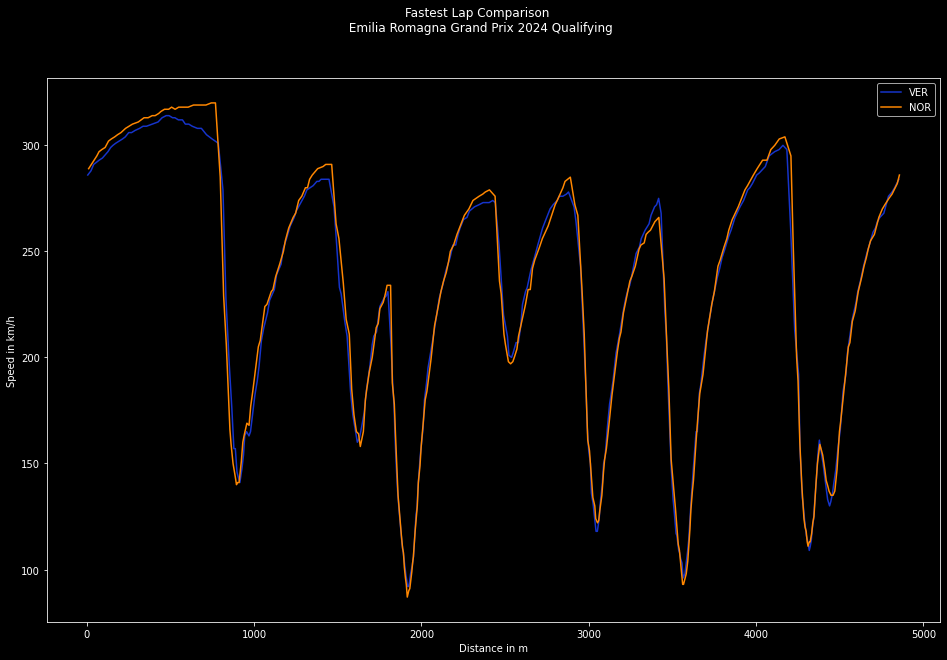

In [91]:
driver1 = 'VER'
driver2 = 'NOR'

lap = 63
driver1_lap = race.laps.pick_driver(driver1).pick_lap(lap)
driver2_lap = race.laps.pick_driver(driver2).pick_lap(lap)


driver1_tel = driver1_lap.get_car_data().add_distance()
driver2_tel = driver2_lap.get_car_data().add_distance()


plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(16, 10)) 
ax.plot(driver1_tel['Distance'], driver1_tel['Speed'], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver1]), label=driver1)
ax.plot(driver2_tel['Distance'], driver2_tel['Speed'], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver2]), label=driver2)

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{quali.event['EventName']} {quali.event.year} Qualifying")

plt.show()

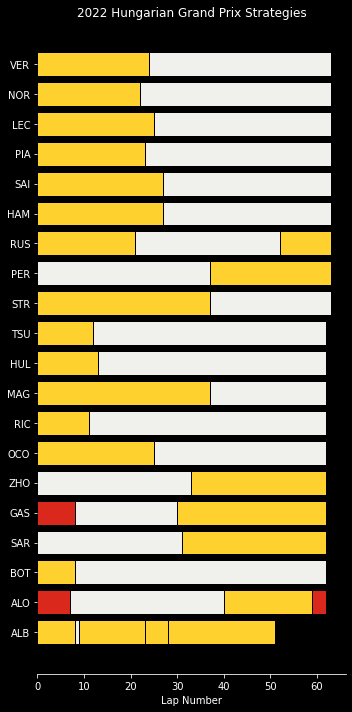

In [98]:
laps = race.laps

drivers = race.drivers

drivers = [race.get_driver(driver)["Abbreviation"] for driver in drivers]

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=ff1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]


plt.title("2022 Hungarian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


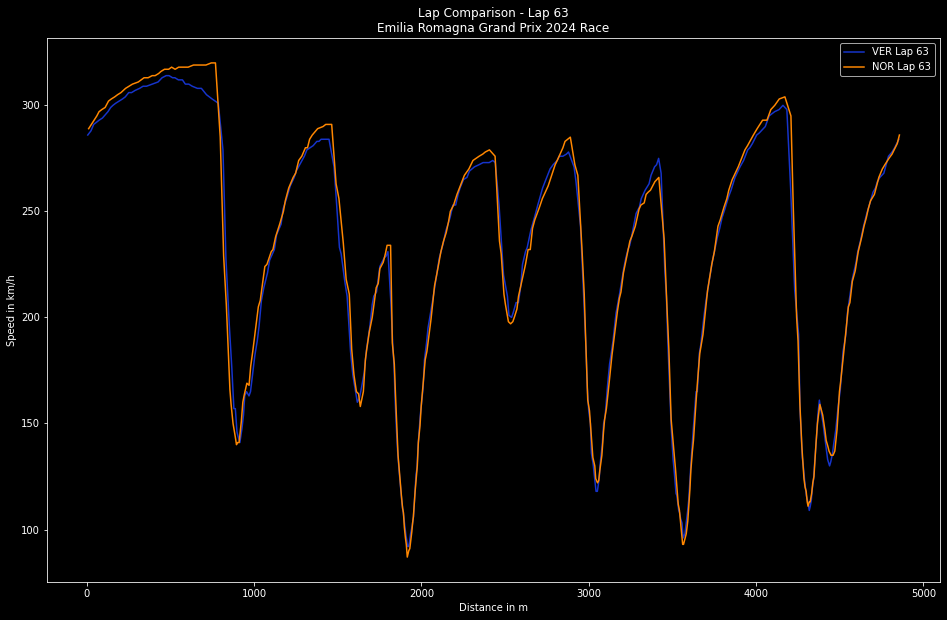

In [83]:
driver1 = 'VER'
driver2 = 'NOR'

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(16, 10))

telemetry_data = {
    driver1: [],
    driver2: []
}

for lap in range(1, 64):
    try:
        driver1_lap = race.laps.pick_driver(driver1).pick_lap(lap)
        driver2_lap = race.laps.pick_driver(driver2).pick_lap(lap)

        driver1_tel = driver1_lap.get_car_data().add_distance()
        driver2_tel = driver2_lap.get_car_data().add_distance()

        telemetry_data[driver1].append(driver1_tel)
        telemetry_data[driver2].append(driver2_tel)
    except:
        continue

def update(frame):
    ax.clear()
    lap_num = frame + 1

    if lap_num <= len(telemetry_data[driver1]):
        driver1_tel = telemetry_data[driver1][lap_num - 1]
        ax.plot(driver1_tel['Distance'], driver1_tel['Speed'], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver1]), label=f'{driver1} Lap {lap_num}')

    if lap_num <= len(telemetry_data[driver2]):
        driver2_tel = telemetry_data[driver2][lap_num - 1]
        ax.plot(driver2_tel['Distance'], driver2_tel['Speed'], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver2]), label=f'{driver2} Lap {lap_num}')

    ax.set_xlabel('Distance in m')
    ax.set_ylabel('Speed in km/h')
    ax.legend()
    ax.set_title(f"Lap Comparison - Lap {lap_num}\n{race.event['EventName']} {race.event.year} Race")

ani = animation.FuncAnimation(fig, update, frames=range(63), repeat=False)

ani.save('lap_comparison.gif', writer='ffmpeg', fps=2)

plt.show()


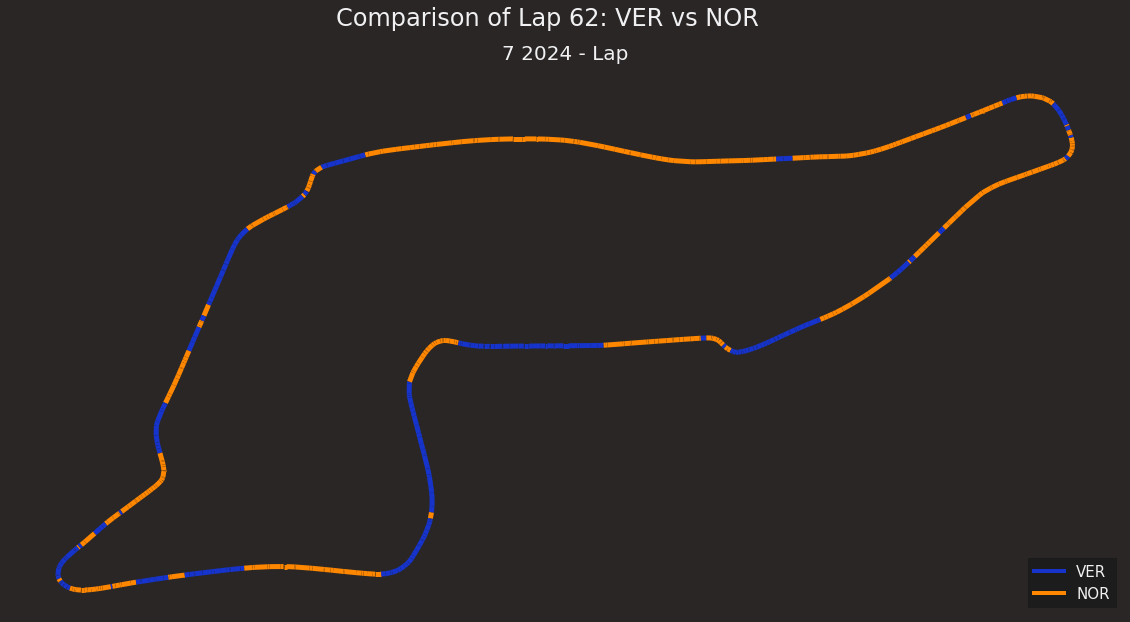

In [190]:
driver1 = 'VER'
driver2 = 'NOR'
lap_no = 62

# Fetch the lap data for both drivers
lap1 = race.laps.pick_driver(driver1).pick_lap(lap_no)
lap2 = race.laps.pick_driver(driver2).pick_lap(lap_no)

# Get the telemetry data for both laps
telemetry1 = lap1.get_telemetry()
telemetry2 = lap2.get_telemetry()

def get_sector_colors(telemetry1, telemetry2):
    colors = []
    for i in range(len(telemetry1)):
        if telemetry1['Speed'].iloc[i] > telemetry2['Speed'].iloc[i]:
            colors.append(ff1.plotting.team_color(DRIVER_TRANSLATE[driver1])) 
        else:
            colors.append(ff1.plotting.team_color(DRIVER_TRANSLATE[driver2]))
    return colors

# Generate the sector colors based on telemetry data
sector_colors = get_sector_colors(telemetry1, telemetry2)

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle(f'Comparison of Lap {lap_no}: {driver1} vs {driver2}', size=24, y=0.97)

# Create segments for the line collection
points = np.array([telemetry1['X'], telemetry1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=sector_colors, linewidth=5)
ax.add_collection(lc)

# Add the black line for the track
ax.plot(telemetry1['X'], telemetry1['Y'], color='black', linestyle='-', linewidth=1, zorder=0)
ax.set_title(f'{race.event.name} {year} - Lap', size=20)

# Create custom legend entries
legend_elements = [
    Line2D([0], [0], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver1]), lw=4, label=f'{driver1}'),
    Line2D([0], [0], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver2]), lw=4, label=f'{driver2}')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=15)

ax.axis('off')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data t

core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core      

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


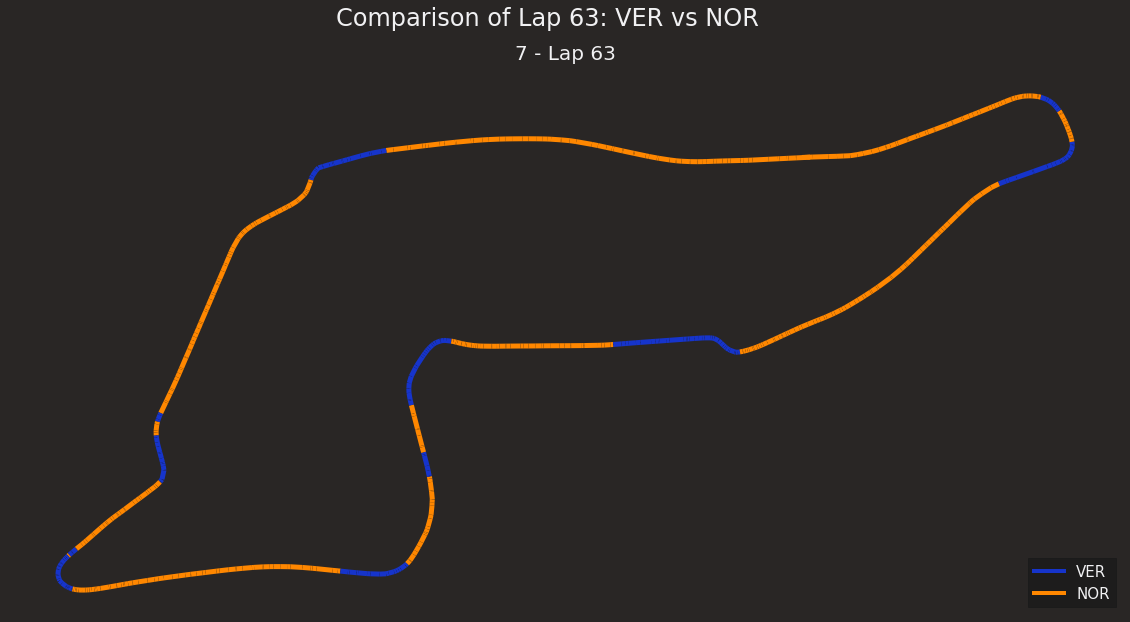

In [188]:
driver1 = 'VER'
driver2 = 'NOR'
num_laps = 63

def update_plot(frame, driver1, driver2, race):
    lap_no = frame + 1
    
    lap1 = race.laps.pick_driver(driver1).pick_lap(lap_no)
    lap2 = race.laps.pick_driver(driver2).pick_lap(lap_no)

    telemetry1 = lap1.get_telemetry()
    telemetry2 = lap2.get_telemetry()

    def get_sector_colors(telemetry1, telemetry2):
        colors = []
        min_length = min(len(telemetry1), len(telemetry2))
        for i in range(min_length):
            if telemetry1['Speed'].iloc[i] > telemetry2['Speed'].iloc[i]:
                colors.append(ff1.plotting.team_color(DRIVER_TRANSLATE[driver1])) 
            else:
                colors.append(ff1.plotting.team_color(DRIVER_TRANSLATE[driver2]))
        return colors

    sector_colors = get_sector_colors(telemetry1, telemetry2)

    ax.clear()

    fig.suptitle(f'Comparison of Lap {lap_no}: {driver1} vs {driver2}', size=24, y=0.97)

    points = np.array([telemetry1['X'], telemetry1['Y']]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, colors=sector_colors, linewidth=5)
    ax.add_collection(lc)

    # Add the black line for the track
    ax.plot(telemetry1['X'], telemetry1['Y'], color='black', linestyle='-', linewidth=1, zorder=0)
    ax.set_title(f'{race.event.name} - Lap {lap_no}', size=20)

    # Create custom legend entries
    legend_elements = [
        Line2D([0], [0], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver1]), lw=4, label=f'{driver1}'),
        Line2D([0], [0], color=ff1.plotting.team_color(DRIVER_TRANSLATE[driver2]), lw=4, label=f'{driver2}')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=15)

    ax.axis('off')

fig, ax = plt.subplots(figsize=(20, 10))

ani = FuncAnimation(fig, update_plot, frames=num_laps, fargs=(driver1, driver2, race), repeat=False)

ani.save('comparison_animation.gif', fps=2, writer='ffmpeg')

plt.show()